### Goal : Predict RPC (Revenue per Click) 

>`The train data consists with 8285423 of samples.
( 1 datatime column, 3 numerical, and 6 category columns)
Basically can recogize this dataset as a "log of digital marketing", i.e. given user group, campaign, keywords.. turns out the performance results (clicks, revenue..)`


>`Since the main variables are all category type, it is important to find the "best combination" of variables above that can "best fit" the target audience (Account_ID) in RPC, i.e. RPC is best in account A with campaign B, Ad C, AND keyword D.`

>`The approach is : First doing EDA, understand data,then data cleaning (dealing with the 2015-01-17 data for instance ), then extract features from variables and make other features based on "hypotheses" (describe below ),then transform these features into matrix (via One-Hot Encode for example), then run simple modeling (logistics regression for example),check the output, then continue the loop : select features, tune super parameter of model until model is well tuned.`





### Feature suggestion :

- Variable :
    - Device_ID
    - Match_type_ID
    - Keyword_ID
    - Ad_group_ID
    - Campaign_ID
    - Account_ID
    - Revenue
    - Clicks
    - Conversions
    - RPC 

- Average feature :
    - avg_account_click
    - avg_campaign_click
    - avg_ad_click
    - avg_keyword_click
- Parameter feature:
    - Campaign_ID_best
    - Device_ID_best
    - Match_type_ID_best
    - Keyword_ID_count
    - Ad_group_ID_count
    - Campaign_ID_count
    

- Median feature :
- standard deviation feature :



### Process : 


    - 0 LOAD DATA 
    - 0'DATA PREPROCESS
    - 1 DATA OVERVIEW
        -1.0 Date
        -1.1 Account_ID
        -1.2 Campaign_ID
        -1.3 Ad_group_ID
        -1.4 Keyword_ID
        -1.5 Device_ID
        -1.6 Match_type_ID
        -1.7 Revenue	
        -1.8 Clicks	
        -1.9 RPC
        -1.10 Conversions	
    - 2 FEATURE ENGINEERING 
    - 3 FEATURE ANALYSIS 
        -3.1 Revenue VS Click
        -3.2 Revenue VS others
    - 4 FEATURE RECOMMENDATION 



### Hypotheses :
- Hierarchy : Account -> Campaign -> Ad group -> Keywords
- Account : TA group (target audidnece)
- Campaign : Ad group in similar scope
- Ad group : key words in the same product 


#### =========================================================================


In [86]:
# load basics library 

import pandas as pd, numpy as np
%matplotlib inline
%pylab inline
import seaborn  as sns 
import matplotlib.pyplot as plt

plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


//anaconda/envs/g_dash/lib/python3.4/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['colors']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## - 0) Load data

In [2]:
# load data 
df_train = pd.read_csv('/Users/yennanliu/analysis/GY_guide/data/train.csv')
df_predict = pd.read_csv('/Users/yennanliu/analysis/GY_guide/data/prediction.csv')



## - 0') Data preprocess

In [3]:
# data preprocess 
df_train.Date = pd.to_datetime(df_train.Date)
df_train['RPC'] = df_train['Revenue']/df_train['Clicks']

## -1)  Data overview

In [4]:
df_train.head(2)

,Date,Keyword_ID,Ad_group_ID,Campaign_ID,Account_ID,Device_ID,Match_type_ID,Revenue,Clicks,Conversions,RPC
0,2014-12-14,88883763407,1042143654876,71672332180,861287123742,298643508640,95725474456,0.0,2,0,0.0
1,2014-12-14,837336088038,1038839743255,685307833020,654870334100,298643508640,95725474456,0.0,2,0,0.0


In [41]:
df_predict.head(2)

,Date,Keyword_ID,Ad_group_ID,Campaign_ID,Account_ID,Device_ID,Match_type_ID
0,2015-04-08,16612910,297740430388,447834681534,604905316813,1077718730738,894413617560
1,2015-04-08,36941707,300293864224,293787647989,604905316813,848779586902,872544605608


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8285423 entries, 0 to 8285422
Data columns (total 11 columns):
Date             datetime64[ns]
Keyword_ID       int64
Ad_group_ID      int64
Campaign_ID      int64
Account_ID       int64
Device_ID        int64
Match_type_ID    int64
Revenue          float64
Clicks           int64
Conversions      int64
RPC              float64
dtypes: datetime64[ns](1), float64(2), int64(8)
memory usage: 695.3 MB


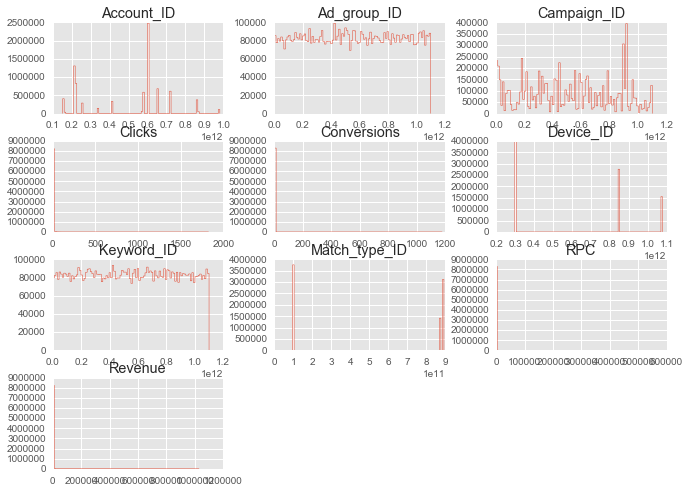

In [35]:
df_train.hist(bins=100, figsize=(11,8),histtype='step')
plt.show()

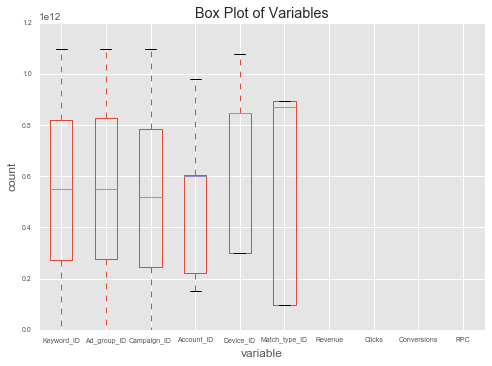

In [6]:
df_train.boxplot(fontsize=7)
plt.ylabel('count')
plt.xlabel('variable')
plt.title('Box Plot of Variables')

> - Train data has 8285423 records, no missing value
- 1 datatime column, 3 numerical, and 6 category columns 

### - 1-0) Date

In [7]:
print ('min date : ', df_train.Date.min())
print ('max date : ', df_train.Date.max())
print ('time period : ', df_train.Date.max() - df_train.Date.min())

min date :  2014-12-14 00:00:00
max date :  2015-04-07 00:00:00
time period :  114 days 00:00:00


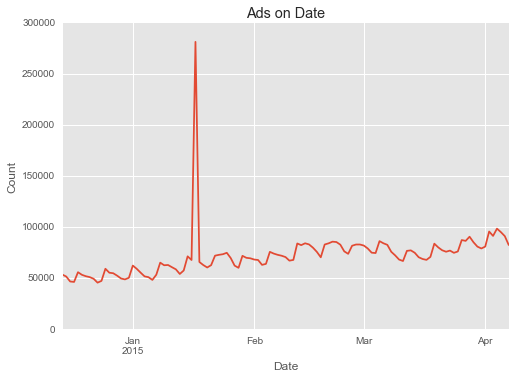

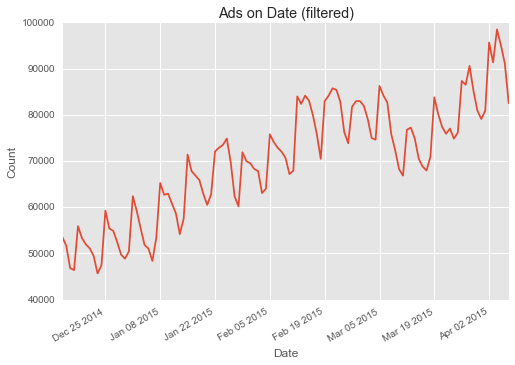

In [8]:
df_train.groupby('Date').count()['Clicks'].plot()

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Ads on Date')
plt.show()

#========================================================================

df_train_ = df_train[df_train.Date != '2015-01-17']
df_train_.groupby('Date').count()['Clicks'].plot()

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Ads on Date (filtered)')
plt.show()


In [9]:
df_train.groupby('Date')\
        .count()['Clicks']\
        .reset_index()\
        .sort_values('Clicks', ascending=False)\
        .head(3)

,Date,Clicks
34,2015-01-17,281063
111,2015-04-04,98501
109,2015-04-02,95677


>- Averagely there are 50k - 90k daily ads push (combination of account/campaign...)
- There was an `sudden boost` of ads data on `2015-01-17` with unknow reason, have to deal with that data specially and check possible causes
- `Transformed` train data since 2014-12-14 to 2015-04-07. 114 days period



### -1-1) Account_ID

In [10]:
print ('Account ID counts : ', len(set(df_train.Account_ID)))

Account ID counts :  16


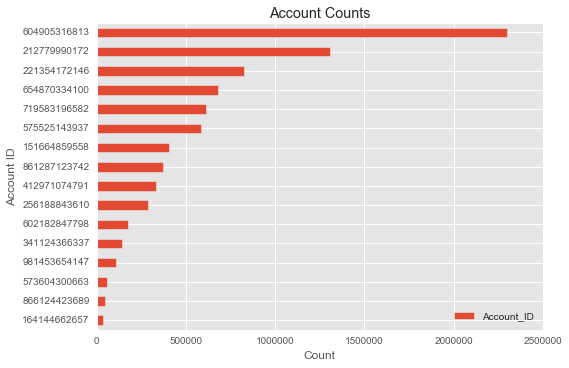

In [11]:
pd.DataFrame(df_train.Account_ID.value_counts()).sort_values('Account_ID').plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Account ID')
plt.title('Account Counts')

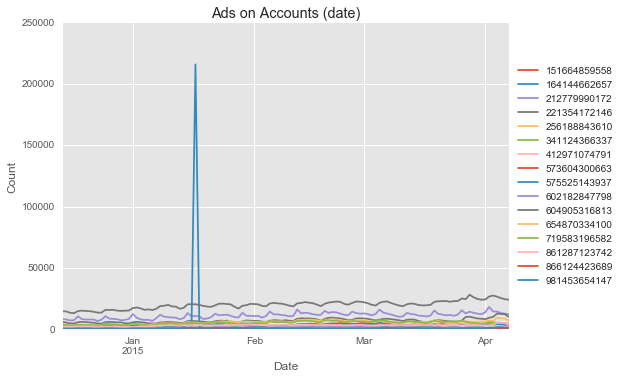

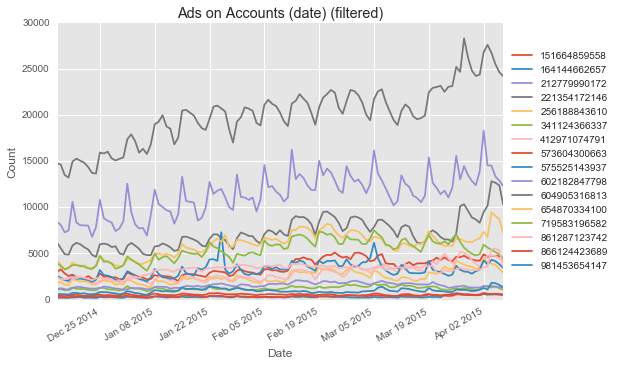

In [12]:
df_account =  df_train.groupby(['Date','Account_ID']).count()['Clicks'].reset_index()
df_account.columns=['Date','Account_ID','count']
df_account_pivot = pd.pivot_table(df_account,columns='Account_ID',index='Date',values='count')
df_account_pivot.plot()

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Ads on Accounts (date)')


#========================================================================
 
df_train_ = df_train[df_train.Date != '2015-01-17']
df_account_ =  df_train_.groupby(['Date','Account_ID']).count()['Clicks'].reset_index()
df_account_.columns=['Date','Account_ID','count']
df_account_pivot_ = pd.pivot_table(df_account_,columns='Account_ID',index='Date',values='count')
df_account_pivot_.plot()

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Ads on Accounts (date) (filtered)')




> 
- There are total 16 different account group in train data
- Some groups have `MUCH MORE` records than others, and take 
   big proportion of total data. Have to check how does this phenomenon   affect revenue/RPC   
- `604905316813 : accounts 27% of all data
212779990172 : accounts 15% of all data `

  

In [13]:
#df_train.head()

### 1-2) Campaign_ID

In [14]:
print ('Campaign  ID counts : ', len(set(df_train.Campaign_ID)))
print ('')
print ('combination of Account ID and Campaign ID : ', 
       len(df_train.groupby(['Account_ID','Campaign_ID']).count()))

Campaign  ID counts :  2927

combination of Account ID and Campaign ID :  2927


In [15]:
#df_acc_camp = df_train.groupby(['Account_ID','Campaign_ID'])\
#                      .agg(['count'])\
#                      .reset_index()

print ('combination of Account ID and Campaign ID and Ad_group ID : ', 
       len(df_train.groupby(['Account_ID','Campaign_ID','Ad_group_ID']).count()))
print ('')
print ('combination of Account ID and Campaign ID and Ad_group ID and Keyword ID  : ', 
       len(df_train.groupby(['Account_ID','Campaign_ID','Ad_group_ID','Keyword_ID']).count()))



combination of Account ID and Campaign ID and Ad_group ID :  269480

combination of Account ID and Campaign ID and Ad_group ID and Keyword ID  :  1051776


,919168440848,901534121494,590366876673,785050164345,184219020943,20237246307,321559281060,306073344781,447834681534,629078497464,...,640983291691,1015333083570,892441562794,885140359158,97294042287,971082466844,709778666899,494238646209,469456081109,575472694632
Campaign_ID,325658,168861,153340,151339,142201,135466,132336,125594,123274,118256,...,1,1,1,1,1,1,1,1,1,1


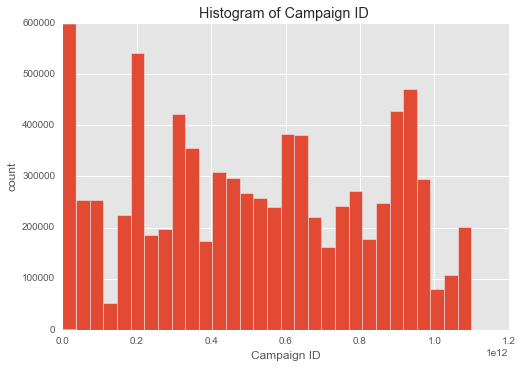

In [16]:

df_train.Campaign_ID.hist(bins=30)
plt.ylabel('count')
plt.xlabel('Campaign ID')
plt.title('Histogram of Campaign ID ')

pd.DataFrame(df_train.Campaign_ID.value_counts()).T

> - There are total 2927 different Campaign group in data 
- Account and Campaign is `SINGLE CORRESPONDENCE` relation, 
  i.e. every different Account has `DIFFERENT` Campaign
  (# of Account : 2927, # of Account and Campaign : 2927)
- Much more combination when considering Ad_group and keyword_ID 
 (269480,1051776 )

### 1.3)  Ad_group_ID

In [17]:
print ('Ad_group ID counts : ', 
       len(set(df_train.Ad_group_ID.value_counts())))

print ('combination of Campaign ID and Ad_group ID : ', 
       len(df_train.groupby(['Campaign_ID','Ad_group_ID']).count()))


Ad_group ID counts :  1414
combination of Campaign ID and Ad_group ID :  269480


,428124648205,501719917851,516274783502,474873553865,450661267600,190014098560,143615983355,1022153389887,691864063258,1044670215658,...,177344361108,881183751172,493819074301,1056455163792,600809141100,472834494438,269408674646,10414713711,346102779860,297058064718
Ad_group_ID,8111,6694,6014,5748,5148,5110,4628,4605,4198,4133,...,1,1,1,1,1,1,1,1,1,1


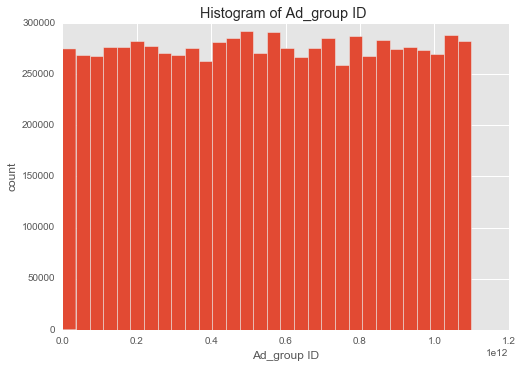

In [18]:
df_train.Ad_group_ID.hist(bins=30)

plt.ylabel('count')
plt.xlabel('Ad_group ID')
plt.title('Histogram of Ad_group ID ')

pd.DataFrame(df_train.Ad_group_ID.value_counts()).T

> - There are total 1414 different Ad group  in data
- Campaign ID and Ad_group ID is `NOT SINGLE CORRESPONDENCE` relation. i.e. given some campaigns have more than 1 Ad_group
- Ad group counts looks distribute equally 

### 1-4) Keyword_ID

In [19]:
print ('Keyword  ID counts : ', 
       len(set(df_train.Keyword_ID.value_counts())))

print ('combination of Ad_group  ID and Keyword ID : ', 
       len(df_train.groupby(['Ad_group_ID','Keyword_ID']).count()))


Keyword  ID counts :  983
combination of Ad_group  ID and Keyword ID :  1051776


,981509692733,460399891066,382171915861,267547501153,224325004348,168388674416,251866733232,697297195535,749749221888,536132178384,...,252397380276,389159317495,242152990630,630736272015,726586877942,235880174274,1072067481595,973268290185,859505539831,751772494905
Keyword_ID,5188,4010,3846,3800,3792,3789,3403,3307,3305,3278,...,1,1,1,1,1,1,1,1,1,1


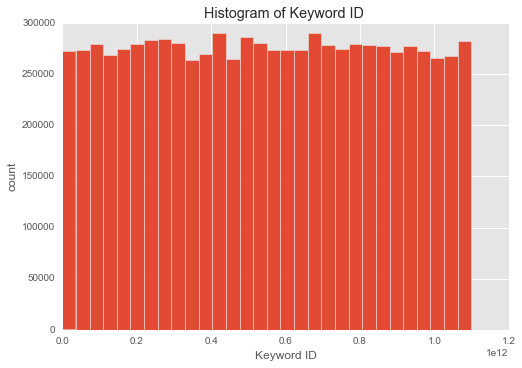

In [20]:
df_train.Keyword_ID.hist(bins=30)
plt.ylabel('count')
plt.xlabel('Keyword ID')
plt.title('Histogram of Keyword ID ')

pd.DataFrame(df_train.Keyword_ID.value_counts()).T

> - There are total 983 Keyword ID group  in data
-  Keyword_ID and Ad_group ID is `NOT SINGLE CORRESPONDENCE` relation. 
- Keyword_ID counts looks distribute equally 

### 1-5) Device_ID

In [21]:
print ('Device  ID counts : ', 
       len(set(df_train.Device_ID.value_counts())))


Device  ID counts :  3


In [22]:
pd.DataFrame(df_train.Device_ID.value_counts()).T

,298643508640,848779586902,1077718730738
Device_ID,3980401,2754187,1550835


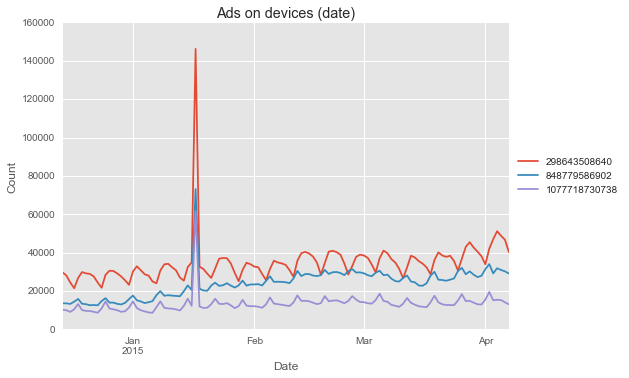

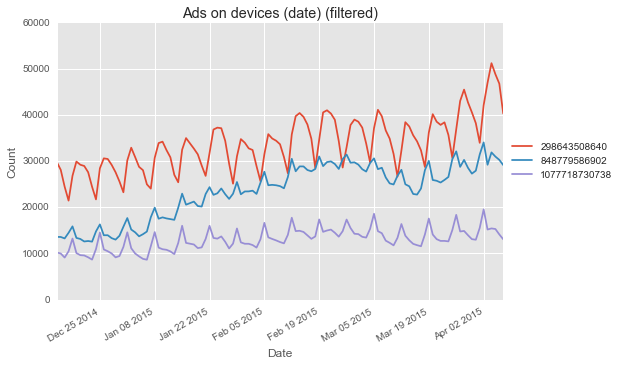

In [23]:
df_account =  df_train.groupby(['Date','Device_ID']).count()['Clicks'].reset_index()
df_account.columns=['Date','Device_ID','count']
df_account_pivot = pd.pivot_table(df_account,columns='Device_ID',index='Date',values='count')
df_account_pivot.plot()

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Ads on devices (date)')


#========================================================================
 
df_train_ = df_train[df_train.Date != '2015-01-17']
df_account_ =  df_train_.groupby(['Date','Device_ID']).count()['Clicks'].reset_index()
df_account_.columns=['Date','Device_ID','count']
df_account_pivot_ = pd.pivot_table(df_account_,columns='Device_ID',index='Date',values='count')
df_account_pivot_.plot()

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Ads on devices (date) (filtered)')




> - Hashed Device_ID may correspond to `Mobile/Computer/Tablet`
- 298643508640 and 848779586902 are about 2x, and 1.8x to the 1077718730738 one 

### 1-6)  Match_type_ID

In [24]:
print ('Match_type  ID counts : ', 
       len(set(df_train.Match_type_ID.value_counts())))


Match_type  ID counts :  3


In [25]:
pd.DataFrame(df_train.Match_type_ID.value_counts()).T

,95725474456,894413617560,872544605608
Match_type_ID,3754784,3115283,1415356


### 1.7)  Revenue   

In [26]:
print ('Revenue  counts : ', 
       len(set(df_train.Revenue.value_counts())))


Revenue  counts :  301


,0.0,597.61,2390.45,3585.68,1792.84,4183.29,4482.1,1195.22,7768.98,2241.05,...,705.18,7389.49,45000.34,31383.7,44874.84,37655.66,37718.41,117425.19,25972.3,17581.8
Revenue,8124774,5820,1901,1880,1759,1601,1510,1405,1361,1340,...,1,1,1,1,1,1,1,1,1,1


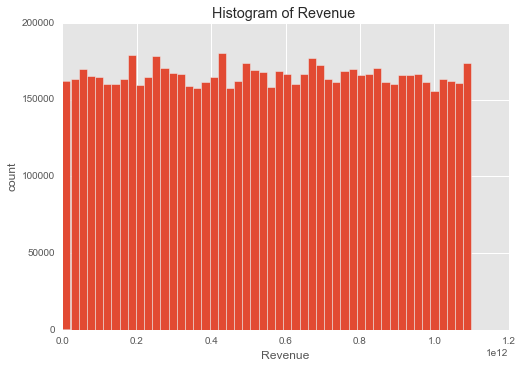

In [27]:
df_train.Keyword_ID.hist(bins=50)
plt.ylabel('count')
plt.xlabel('Revenue')
plt.title('Histogram of Revenue ')

pd.DataFrame(df_train.Revenue.value_counts()).T

### 1.8)  Clicks  

In [28]:
print ('Clicks  counts : ', 
       len(set(df_train.Clicks.value_counts())))


Clicks  counts :  87


,2,5,8,11,14,17,20,23,26,29,...,664,655,646,640,637,634,631,628,625,1827
Clicks,6510187,1117227,316358,132738,68187,39057,24755,17114,11806,8643,...,1,1,1,1,1,1,1,1,1,1


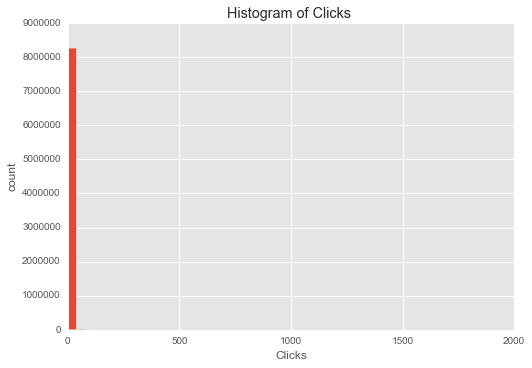

In [29]:
df_train.Clicks.hist(bins=50)
plt.ylabel('count')
plt.xlabel('Clicks')
plt.title('Histogram of Clicks ')

pd.DataFrame(df_train.Clicks.value_counts()).T

### 1.9) RPC

In [30]:
print ('RPC  counts : ', 
       len(set(df_train.RPC.value_counts())))


RPC  counts :  257


,0.0,298.805,119.522,1792.84,896.42,1195.225,2091.645,2241.05,1120.525,3884.49,...,344.442727273,2827.908,1993.21823529,466.992142857,834.268,7517.985,2306.0425,2167.546,89.787804878,539.806153846
RPC,8124774,2573,1381,1029,1003,968,804,791,726,691,...,1,1,1,1,1,1,1,1,1,1


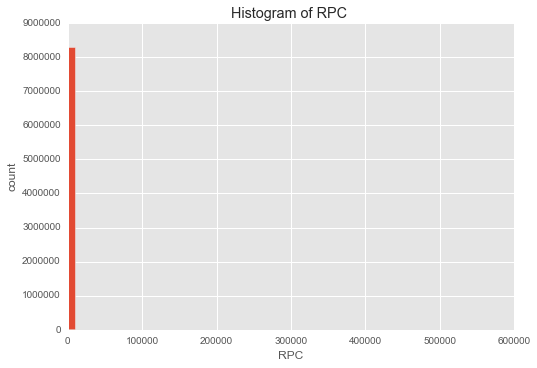

In [31]:
df_train.RPC.hist(bins=50)
plt.ylabel('count')
plt.xlabel('RPC')
plt.title('Histogram of RPC ')

pd.DataFrame(df_train.RPC.value_counts()).T

### 1.10) Conversions    

In [32]:
print ('Conversions  counts : ', 
       len(set(df_train.Conversions.value_counts())))


Conversions  counts :  28


In [33]:
#df_train.RPC.hist(bins=50)
#plt.ylabel('count')
#plt.xlabel('Conversions')
#plt.title('Histogram of Conversions ')

pd.DataFrame(df_train.Conversions.value_counts()).T

,0,2,5,8,11,14,17,20,23,26,...,144,295,177,153,401,135,112,106,82,1180
Conversions,8123396,145541,12005,2507,810,355,234,109,73,66,...,1,1,1,1,1,1,1,1,1,1


## 2) FEATURE ENGINEERING 

In [34]:

def get_avg_value(df):
    df_ = df.copy()
    # get avg value
    # account
    avg_account_click = pd.DataFrame(df_.groupby(['Account_ID']).agg(np.mean)['Clicks']).reset_index()
    avg_account_click.columns = ['Account_ID','avg_account_click']
    # campaign
    avg_campaign_click = pd.DataFrame(df_.groupby(['Campaign_ID']).agg(np.mean)['Clicks']).reset_index()
    avg_campaign_click.columns = ['Campaign_ID','avg_campaign_click']
    # ad group
    avg_ad_click = pd.DataFrame(df_.groupby(['Ad_group_ID']).agg(np.mean)['Clicks']).reset_index()
    avg_ad_click.columns = ['Ad_group_ID','avg_ad_click']
    # keyword
    avg_keyword_click = pd.DataFrame(df_.groupby(['Keyword_ID']).agg(np.mean)['Clicks']).reset_index()
    avg_keyword_click.columns = ['Keyword_ID','avg_keyword_click']
    # merge 
    df__ = pd.merge(df_, avg_account_click, on=['Account_ID'], how='inner')
    df__ = pd.merge(df__, avg_campaign_click, on=['Campaign_ID'], how='inner')
    df__ = pd.merge(df__, avg_ad_click, on=['Ad_group_ID'], how='inner')
    df__ = pd.merge(df__, avg_keyword_click, on=['Keyword_ID'], how='inner')
    return df__




def best_parameter(df):
    df_ = df.copy()
    account = list(set(df_.Account_ID))
    output = pd.DataFrame()
    for id in account:
        dfx = df_train[df_train['Account_ID'] ==id]
        dfx.loc[dfx['Revenue'].idxmax()]
        dfx_ = pd.DataFrame(dfx.loc[dfx['Revenue'].idxmax()][0:7]).T
        col_ = [x + '_best' if x != 'Account_ID' else x for x in dfx_.columns ]
        dfx_.columns = col_
        #print (dfx_.head(1))
        output = output.append(dfx_)
    # merge back 
    df_ = pd.merge(df_, output, on=['Account_ID'], how='inner')
    return df_

def get_num_parameter(df):
    df_ = df.copy()
    # get counts of campaigns on accounts 
    campaign_count = df_.groupby(['Account_ID','Campaign_ID'])\
                        .agg('count')['Clicks']\
                        .reset_index()
    campaign_count.columns = ['Account_ID','Campaign_ID','campaign_count']
    # merge back 
    df__ = pd.merge(df_, campaign_count, on=['Account_ID','Campaign_ID'], how='inner')
    return df__


def get_num_parameter_(df):
    df_ = df.copy()
    count_list = ['Keyword_ID', 'Ad_group_ID', 'Campaign_ID']
    #col = ['{}_count'.format(x)  for x in  count_list ]
    # get counts of variables on accounts 
    for item in count_list:
        colname = '{}_count'.format(item)
        temp = df_.groupby(['Account_ID',item])\
                  .agg('count')['Clicks']\
                  .reset_index()
        temp.columns = ['Account_ID',item,colname]
    # merge back 
        df_ = pd.merge(df_, temp, on=['Account_ID',item], how='inner')
    return df_
    

In [36]:
df_train_ = get_avg_value(df_train)

In [37]:
df_train_ = best_parameter(df_train_)

In [38]:
df_train_ = get_num_parameter_(df_train_)

In [98]:
df_train_.head(2)

,Date,Keyword_ID,Ad_group_ID,Campaign_ID,Account_ID,Device_ID,Match_type_ID,Revenue,Clicks,Conversions,...,avg_keyword_click,Date_best,Keyword_ID_best,Ad_group_ID_best,Campaign_ID_best,Device_ID_best,Match_type_ID_best,Keyword_ID_count,Ad_group_ID_count,Campaign_ID_count
0,2014-12-14,88883763407,1042143654876,71672332180,861287123742,298643508640,95725474456,0.0,2,0,...,3.13245,2015-02-06 00:00:00,723895291976,1005171317784,154339971518,298643508640,95725474456,45,3206,21111
1,2014-12-17,88883763407,1042143654876,71672332180,861287123742,298643508640,95725474456,0.0,2,0,...,3.13245,2015-02-06 00:00:00,723895291976,1005171317784,154339971518,298643508640,95725474456,45,3206,21111


## 3) Feature Analysis 

### 3.1) Revenue VS Click

(0, 400000)

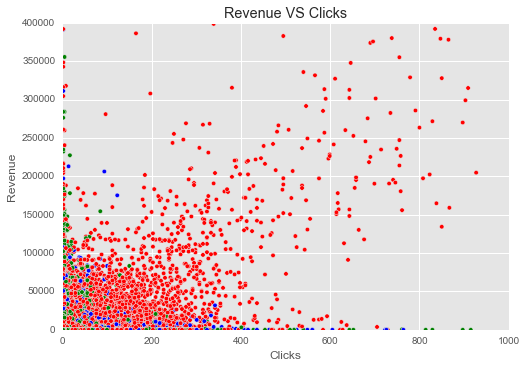

In [58]:

colors = {95725474456:'red', 872544605608:'blue',894413617560:'green'}
plt.scatter(df_train.Clicks,df_train.Revenue,c=df_train.Match_type_ID.apply(lambda x: colors[x]))
plt.xlabel('Clicks')
plt.ylabel('Revenue')
plt.title('Revenue VS Clicks')
plt.xlim(0,1000)
plt.ylim(0,400000)

(0, 10000)

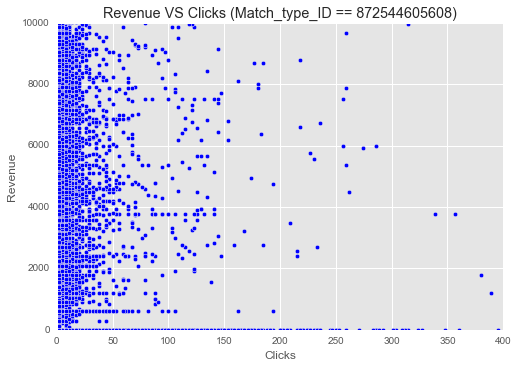

In [62]:
dfx=df_train[df_train.Match_type_ID == 872544605608]
plt.scatter(dfx.Clicks,dfx.Revenue)
plt.xlabel('Clicks')
plt.ylabel('Revenue')
plt.title('Revenue VS Clicks (Match_type_ID == 872544605608)')
plt.xlim(0,400)
plt.ylim(0,10000)

(0, 10000)

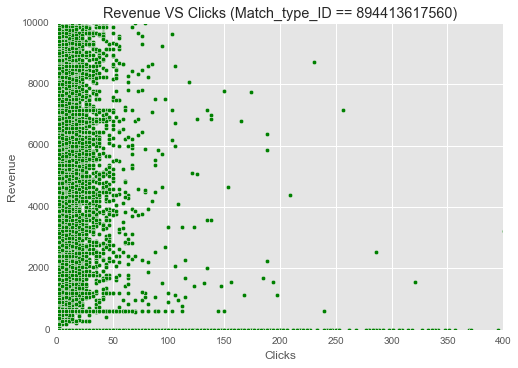

In [65]:
dfx=df_train[df_train.Match_type_ID == 894413617560]
plt.scatter(dfx.Clicks,dfx.Revenue,c = 'green')
plt.xlabel('Clicks')
plt.ylabel('Revenue')
plt.title('Revenue VS Clicks (Match_type_ID == 894413617560)')
plt.xlim(0,400)
plt.ylim(0,10000)

- If match_type = 95725474456, the more user clicks, the more revenue made
  (seems a positive tendency)
  
- User in match_type =872544605608 click medium (0-75), seems no apparent 
pattern in this distribution

- User in match_type =894413617560 click least (0-50), as the 872544605608 one, maybe there are other factors are important as well in these case 

### 3-2) Revenue VS others 

In [89]:
#user_group = df_train.groupby('Account_ID').mean()[['Revenue']]

user_group = df_train.groupby('Account_ID')\
                     .agg({np.mean,np.median,np.std})['Revenue']\
                     .reset_index()

user_group.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Account_ID,1.516649e+11,1.641447e+11,2.127800e+11,2.213542e+11,2.561888e+11,3.411244e+11,4.129711e+11,5.736043e+11,5.755251e+11,6.021828e+11,6.049053e+11,6.548703e+11,7.195832e+11,8.612871e+11,8.661244e+11,9.814537e+11
mean,1.140435e+02,2.743307e+02,2.743418e+02,1.335548e+02,2.807217e+01,1.883137e+02,6.063599e+01,3.157994e+02,1.186052e+02,1.030430e+02,1.660814e+02,1.819260e+02,2.308280e+02,2.824711e+02,1.249130e+02,2.802312e+02
std,1.519538e+03,2.704789e+03,3.574256e+03,1.670445e+03,8.283087e+02,2.100210e+03,1.012303e+03,3.200496e+03,1.396754e+03,1.349595e+03,2.313435e+03,1.908263e+03,2.216010e+03,2.749587e+03,1.335316e+03,2.477188e+03
median,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


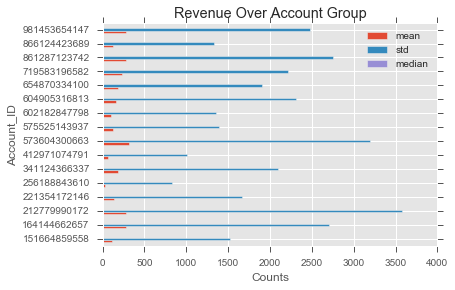

In [88]:
user_group.set_index('Account_ID').plot(kind='barh')
plt.xlabel('Counts')
plt.title('Revenue Over Account Group')